In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.decomposition import PCA
from scipy.optimize import linear_sum_assignment

1. K-Mean for all features & K = 3

   sepal_length  sepal_width  petal_length  petal_width      species
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa


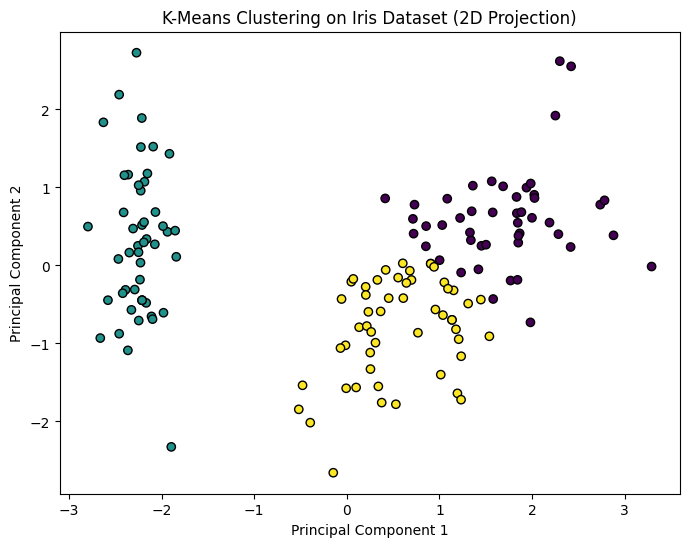

Silhouette Score: 0.454


In [32]:
# Load the dataset (adjust path as necessary for your local machine)
df = pd.read_csv('iris.txt', delimiter=",")
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
print(df.head())

# Selecting only numerical features
X = df.iloc[:, :-1].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df["Cluster"] = clusters

# Visualize clusters using PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", edgecolors="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on Iris Dataset (2D Projection)")
plt.show()

# Compute the silhouette score
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.3f}")

In [33]:
# ---------- Accuracy Computation with Labeled Data ----------

# Convert the true species labels to numeric values
true_labels, uniques = pd.factorize(df["species"])
# Build the confusion matrix between clusters and true labels
num_clusters = len(np.unique(clusters))
num_classes = len(uniques)
conf_matrix = np.zeros((num_clusters, num_classes), dtype=int)
for i in range(len(true_labels)):
    conf_matrix[clusters[i], true_labels[i]] += 1

# Solve the linear assignment problem to find the best mapping between cluster labels and true labels
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
mapping = dict(zip(row_ind, col_ind))

# Map each cluster to the corresponding true label based on the best assignment
mapped_labels = np.zeros_like(clusters)
for cluster, label in mapping.items():
    mapped_labels[clusters == cluster] = label

# Calculate the accuracy
acc = accuracy_score(true_labels, mapped_labels)
print(f"Clustering Accuracy: {acc:.3f}")

Clustering Accuracy: 0.832


2. Find optimal K value using Elbow method

Optimal number of clusters: 2


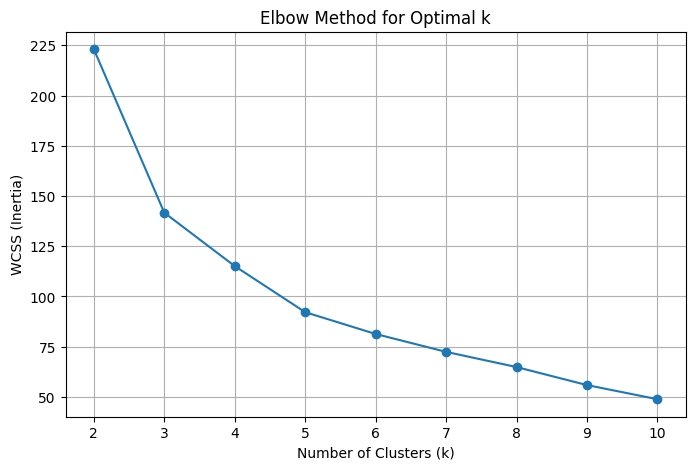

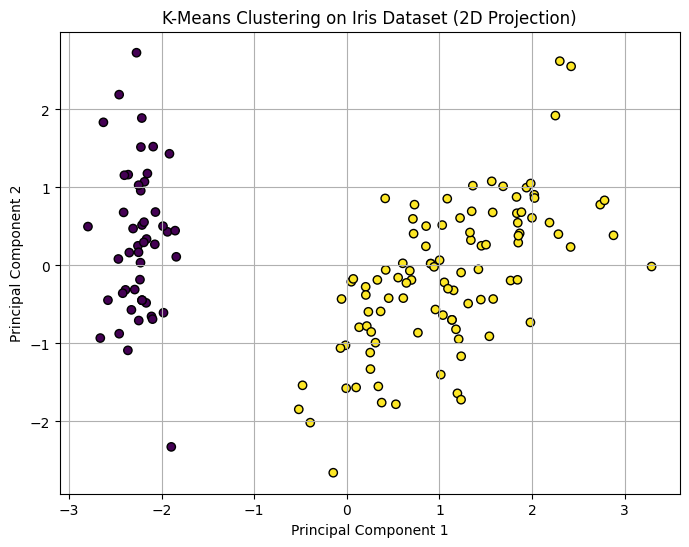

Silhouette Score: 0.580
Clustering Accuracy: 0.664


In [34]:
# Load the dataset (adjust path as necessary)
df = pd.read_csv('iris.txt', delimiter=",")
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
# print(df.head())

# Selecting only numerical features
X = df.iloc[:, :-1].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
wcss = []  # Within-Cluster Sum of Squares
sil_scores = []
k_values = range(2, 11)  # Testing k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, clusters))

# Identify the best k using the maximum silhouette score after the elbow
optimal_k = k_values[np.argmax(sil_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

# Apply KMeans clustering with the best k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df["Cluster"] = clusters

# Visualize clusters using PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", edgecolors="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on Iris Dataset (2D Projection)")
plt.grid(True)
plt.show()

# Compute the silhouette score
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.3f}")

# ---------- Accuracy Computation with Labeled Data ----------

# Convert the true species labels to numeric values
true_labels, uniques = pd.factorize(df["species"])

# Build the confusion matrix between clusters and true labels
num_clusters = len(np.unique(clusters))
num_classes = len(uniques)
conf_matrix = np.zeros((num_clusters, num_classes), dtype=int)
for i in range(len(true_labels)):
    conf_matrix[clusters[i], true_labels[i]] += 1

# Solve the linear assignment problem to find the best mapping between cluster labels and true labels
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
mapping = dict(zip(row_ind, col_ind))

# Map each cluster to the corresponding true label based on the best assignment
mapped_labels = np.zeros_like(clusters)
for cluster, label in mapping.items():
    mapped_labels[clusters == cluster] = label

# Calculate the accuracy
acc = accuracy_score(true_labels, mapped_labels)
print(f"Clustering Accuracy: {acc:.3f}")

3. Different Implementation

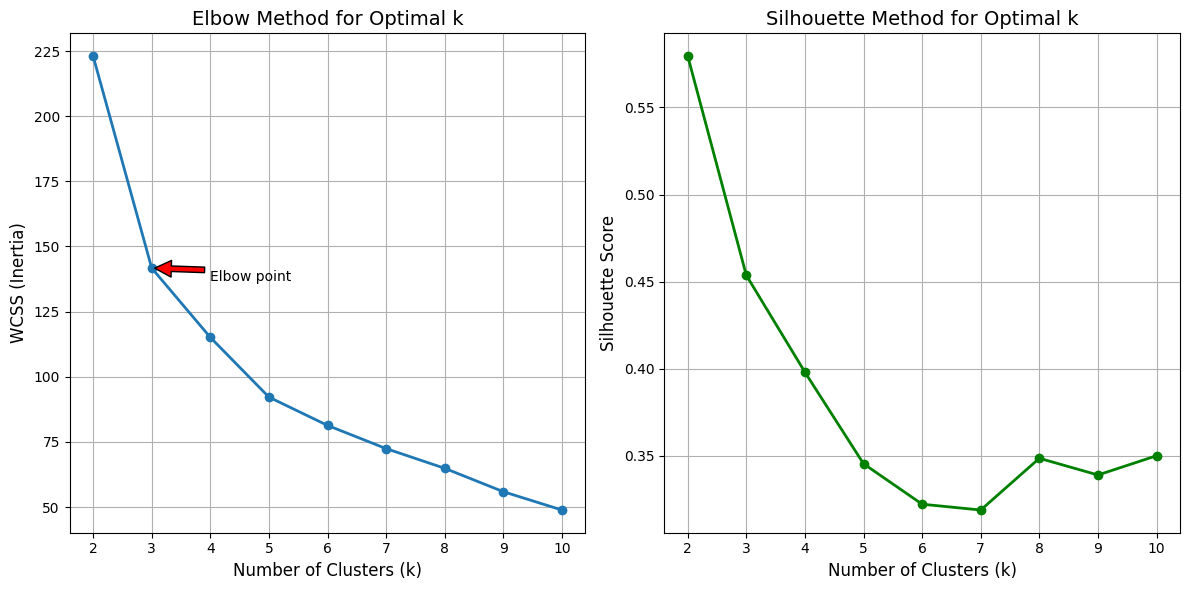

Using k=3 for Iris dataset (known to have 3 species)


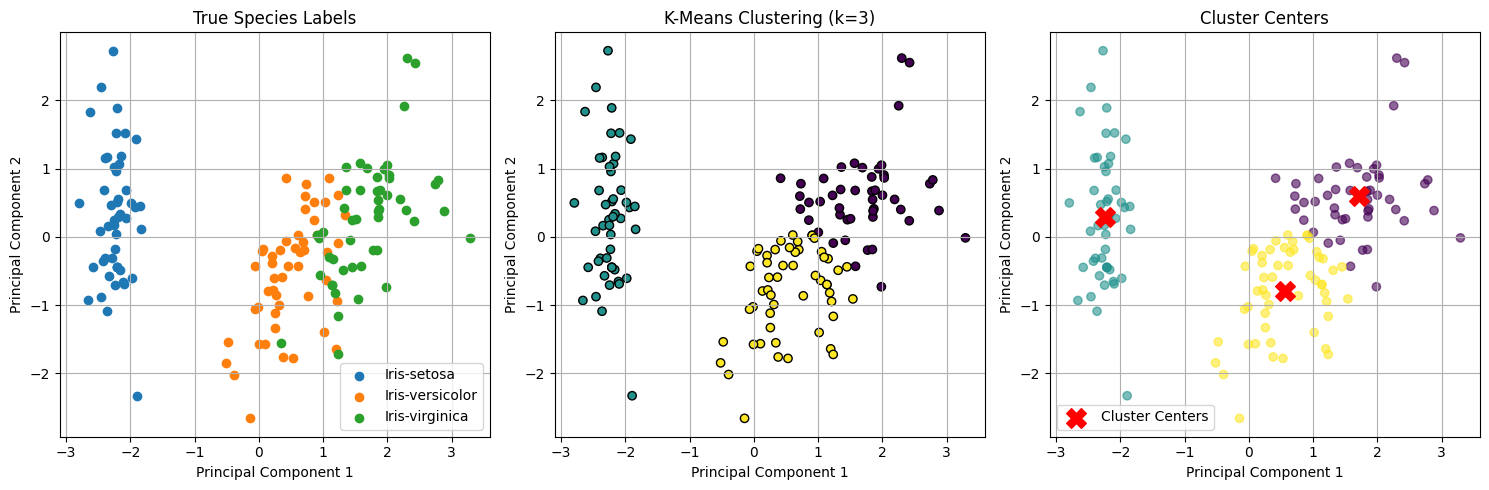

Silhouette Score: 0.454
Confusion Matrix (rows: clusters, columns: true species):
[[ 0 11 36]
 [49  0  0]
 [ 0 39 14]]
Clustering Accuracy: 0.832
Cluster 0 -> Iris-virginica
Cluster 1 -> Iris-setosa
Cluster 2 -> Iris-versicolor

Trying different initializations to improve accuracy...


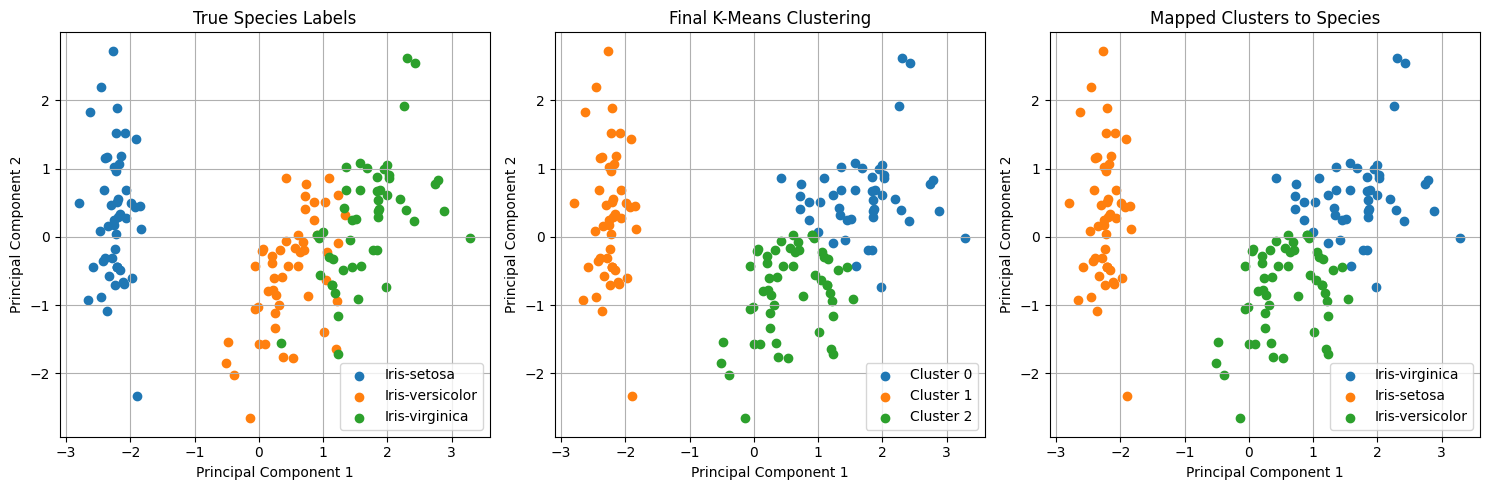

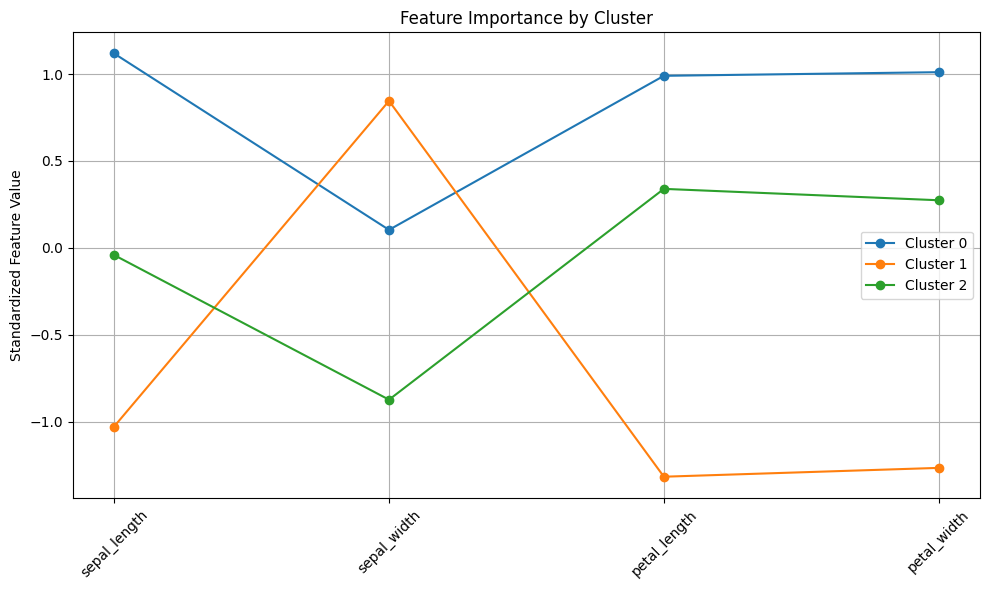

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, accuracy_score
from scipy.optimize import linear_sum_assignment

# Load the dataset (adjust path as necessary)
df = pd.read_csv('iris.txt', delimiter=",")
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
# print(df.head())

# Selecting only numerical features
X = df.iloc[:, :-1].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
wcss = []  # Within-Cluster Sum of Squares
sil_scores = []
k_values = range(2, 11)  # Testing k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, clusters))

# Plot the elbow graph with clear annotation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker="o", linestyle="-", linewidth=2)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("WCSS (Inertia)", fontsize=12)
plt.title("Elbow Method for Optimal k", fontsize=14)
plt.grid(True)
plt.annotate('Elbow point', xy=(3, wcss[1]), xytext=(4, wcss[1]-5),
            arrowprops=dict(facecolor='red', shrink=0.05))

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, sil_scores, marker="o", linestyle="-", color="green", linewidth=2)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Method for Optimal k", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Since we know the Iris dataset has 3 classes, we'll use k=3
# You can also use the silhouette score to determine k, but the domain knowledge is valuable here
k = 3
print(f"Using k=3 for Iris dataset (known to have 3 species)")

# Apply KMeans clustering with k=3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df["Cluster"] = clusters

# Visualize clusters using PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA projection with true species labels
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
for i, species in enumerate(df['species'].unique()):
    idx = df['species'] == species
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=species)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("True Species Labels")
plt.legend()
plt.grid(True)

# Plot the PCA projection with cluster assignments
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", edgecolors="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (k=3)")
plt.grid(True)

# Plot the feature space with cluster centers
plt.subplot(1, 3, 3)
# Get the cluster centers in the original feature space
centers = scaler.inverse_transform(kmeans.cluster_centers_)
# Project the centers to the PCA space
centers_pca = pca.transform(kmeans.cluster_centers_)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.6)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Centers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute the silhouette score
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.3f}")

# ---------- Accuracy Computation with Labeled Data ----------

# Convert the true species labels to numeric values
true_labels, uniques = pd.factorize(df["species"])

# Build the confusion matrix between clusters and true labels
num_clusters = len(np.unique(clusters))
num_classes = len(uniques)
conf_matrix = np.zeros((num_clusters, num_classes), dtype=int)
for i in range(len(true_labels)):
    conf_matrix[clusters[i], true_labels[i]] += 1

print("Confusion Matrix (rows: clusters, columns: true species):")
print(conf_matrix)

# Solve the linear assignment problem to find the best mapping between cluster labels and true labels
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
mapping = dict(zip(row_ind, col_ind))

# Map each cluster to the corresponding true label based on the best assignment
mapped_labels = np.zeros_like(clusters)
for cluster, label in mapping.items():
    mapped_labels[clusters == cluster] = label

# Calculate the accuracy
acc = accuracy_score(true_labels, mapped_labels)
print(f"Clustering Accuracy: {acc:.3f}")

# Let's also display which cluster corresponds to which species
for cluster, species_idx in mapping.items():
    print(f"Cluster {cluster} -> {uniques[species_idx]}")

# Try initializing with different seeds if accuracy is not satisfactory
if acc < 0.85:
    print("\nTrying different initializations to improve accuracy...")
    best_acc = acc
    best_kmeans = kmeans
    best_clusters = clusters
    
    for seed in range(10, 100, 10):
        kmeans_new = KMeans(n_clusters=k, random_state=seed, n_init=10)
        clusters_new = kmeans_new.fit_predict(X_scaled)
        
        # Build confusion matrix for this clustering
        conf_matrix_new = np.zeros((num_clusters, num_classes), dtype=int)
        for i in range(len(true_labels)):
            conf_matrix_new[clusters_new[i], true_labels[i]] += 1
        
        # Find the best mapping
        row_ind_new, col_ind_new = linear_sum_assignment(-conf_matrix_new)
        mapping_new = dict(zip(row_ind_new, col_ind_new))
        
        # Map clusters to true labels
        mapped_labels_new = np.zeros_like(clusters_new)
        for cluster, label in mapping_new.items():
            mapped_labels_new[clusters_new == cluster] = label
        
        # Calculate accuracy
        acc_new = accuracy_score(true_labels, mapped_labels_new)
        
        if acc_new > best_acc:
            best_acc = acc_new
            best_kmeans = kmeans_new
            best_clusters = clusters_new
            print(f"  Found better initialization with seed {seed}, accuracy: {acc_new:.3f}")
    
    if best_acc > acc:
        print(f"\nFinal improved clustering accuracy: {best_acc:.3f}")
        kmeans = best_kmeans
        clusters = best_clusters
        df["Cluster"] = clusters
        
        # Recalculate mapping for the best clustering
        conf_matrix = np.zeros((num_clusters, num_classes), dtype=int)
        for i in range(len(true_labels)):
            conf_matrix[clusters[i], true_labels[i]] += 1
        
        row_ind, col_ind = linear_sum_assignment(-conf_matrix)
        mapping = dict(zip(row_ind, col_ind))
        
        # Show the final mapping
        print("\nFinal mapping of clusters to species:")
        for cluster, species_idx in mapping.items():
            print(f"Cluster {cluster} -> {uniques[species_idx]}")

# Visualize the final clustering performance
plt.figure(figsize=(15, 5))

# Plot the PCA projection with true species labels
plt.subplot(1, 3, 1)
for i, species in enumerate(df['species'].unique()):
    idx = df['species'] == species
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=species)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("True Species Labels")
plt.legend()
plt.grid(True)

# Plot the PCA projection with cluster assignments
plt.subplot(1, 3, 2)
for i in range(k):
    idx = clusters == i
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f"Cluster {i}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Final K-Means Clustering")
plt.legend()
plt.grid(True)

# Plot the mapping between clusters and species
plt.subplot(1, 3, 3)
for cluster, species_idx in mapping.items():
    idx = clusters == cluster
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f"{uniques[species_idx]}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Mapped Clusters to Species")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Feature importance analysis
feature_names = df.columns[:-2]  # All features except species and Cluster
centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.plot(centers[i], marker='o', linestyle='-', label=f'Cluster {i}')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.ylabel('Standardized Feature Value')
plt.title('Feature Importance by Cluster')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()